## Wprowadzenie
Skrypt pokazuje jak użyć pakietu SciKit do grupowania danych. Rozważane są dwa przykłady: dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich oraz dane IRIS.

In [4]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

In [65]:
import matplotlib.colors as colors
from itertools import cycle
# from clustering_indexex import (davies_bouldin_index, dunn_index)

def plotClustering(X, plt_labels, features=(0,1), ax=plt):
    if features[0] == features[1]:
        ax.hist(
            X[:, features[0]],
            edgecolor='black'
        )
    else:
        ax.scatter(
            X[:,features[0]],
            X[:,features[1]],
            c=plt_labels,
            edgecolor='black'
        )
        
# def count_metrics(X, labels, centroids=None):
#     pprint.pprint({
#         'Silhouette': metrics.silhouette_score(X, labels, metric='euclidean'),
#         'dunn_index': dunn_index(X, labels, centroids),
#         'davies_bouldin_index': davies_bouldin_index(X, labels, centroids)
#     })

## 1. Pierwszy zestaw danych
Dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich

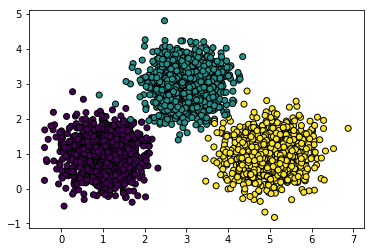

In [33]:
from sklearn import datasets

centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

plotClustering(X, labels)

### Grupowanie za pomocą KMeans

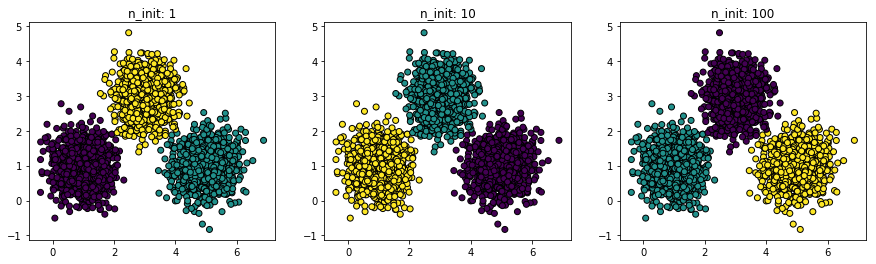

In [39]:
# n-init: Number of time the k-means algorithm will be run with different centroid
#         seeds. The final results will be the best output of n_init consecutive
#         runs in terms of inertia.

fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
for ax, n_init in zip(axes, [1,10,100]):
    k_means = KMeans(init='k-means++', n_clusters=3, n_init=n_init)
    k_means.fit(X)
    plotClustering(X, k_means.labels_, ax=ax)
    ax.set_title(f'n_init: {n_init}')

### Grupowanie za pomocą MiniBatchKMeans

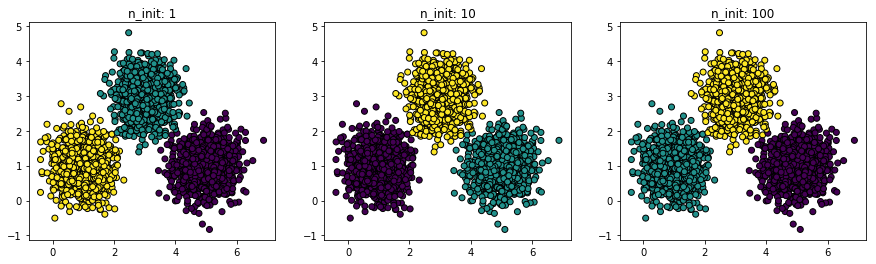

In [40]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
for ax, n_init in zip(axes, [1,10,100]):
    mini_batch_k_means = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=100, n_init=n_init, max_no_improvement=10, verbose=0, random_state=0)
    mini_batch_k_means.fit(X)
    plotClustering(X, mini_batch_k_means.labels_, ax=ax)
    ax.set_title(f'n_init: {n_init}')


### Grupowanie za pomocą Birch bez wtórnego grupowania

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/cluster/birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


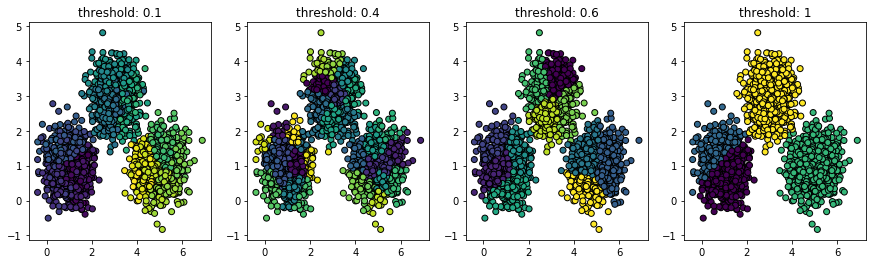

In [44]:
# The radius of the subcluster obtained by merging a new sample 
# and the closest subcluster should be lesser than the threshold. 
# Otherwise a new subcluster is started. Setting this value 
# to be very low promotes splitting and vice-versa.

fig, axes = plt.subplots(1,4)
fig.set_size_inches(15,4)
for ax, threshold in zip(axes, [0.1,0.4,0.6, 1]):
    birch = Birch(threshold=threshold, n_clusters=None)
    birch.fit(X)
    plotClustering(X, birch.labels_, ax=ax)
    ax.set_title(f'threshold: {threshold}')

### Grupowanie za pomocą Birch z wtórnym grupowaniem

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/cluster/birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


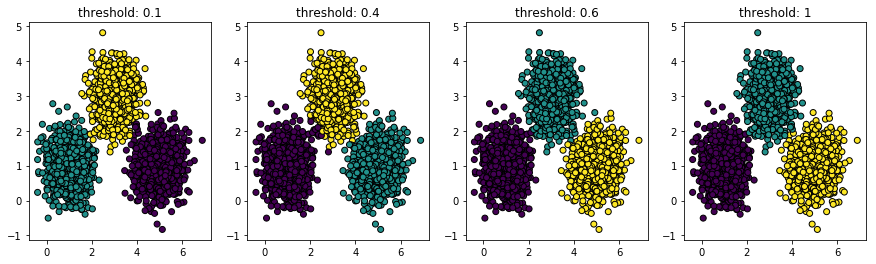

In [45]:
fig, axes = plt.subplots(1,4)
fig.set_size_inches(15,4)
for ax, threshold in zip(axes, [0.1,0.4,0.6, 1]):
    birch = Birch(threshold=threshold, n_clusters=3)
    birch.fit(X)
    plotClustering(X, birch.labels_, ax=ax)
    ax.set_title(f'threshold: {threshold}')

### Grupowanie za pomocą DBScan

{0, 1, 2, 3, 4, 5, 6, 7, -1}
{0, 1, 2, -1}
{0, 1, 2, -1}
{0, 1, -1}


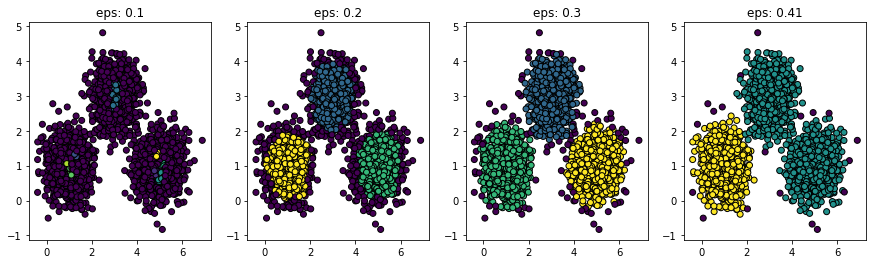

In [59]:
# The maximum distance between two samples 
# for them to be considered as in the same neighborhood.

fig, axes = plt.subplots(1,4)
fig.set_size_inches(15,4)
for ax, eps in zip(axes, [0.1, 0.2, 0.3, 0.41]):
    dbscan = DBSCAN(eps=eps, min_samples=25)
    dbscan.fit(X)
    plotClustering(X, dbscan.labels_, ax=ax)
    ax.set_title(f'eps: {eps}')

## 2. Drugi zestaw danych
Dane IRIS

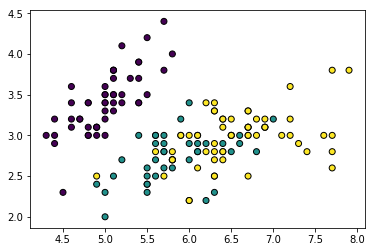

In [62]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
plotClustering(X[:, :2], iris.target)

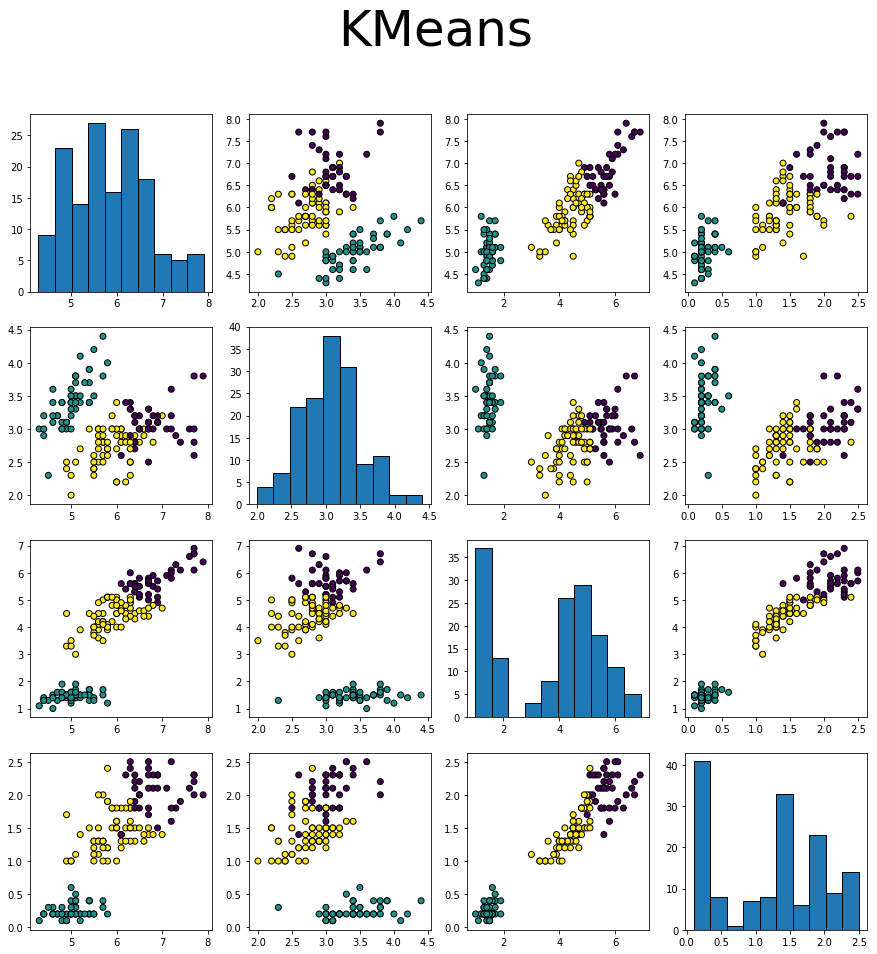

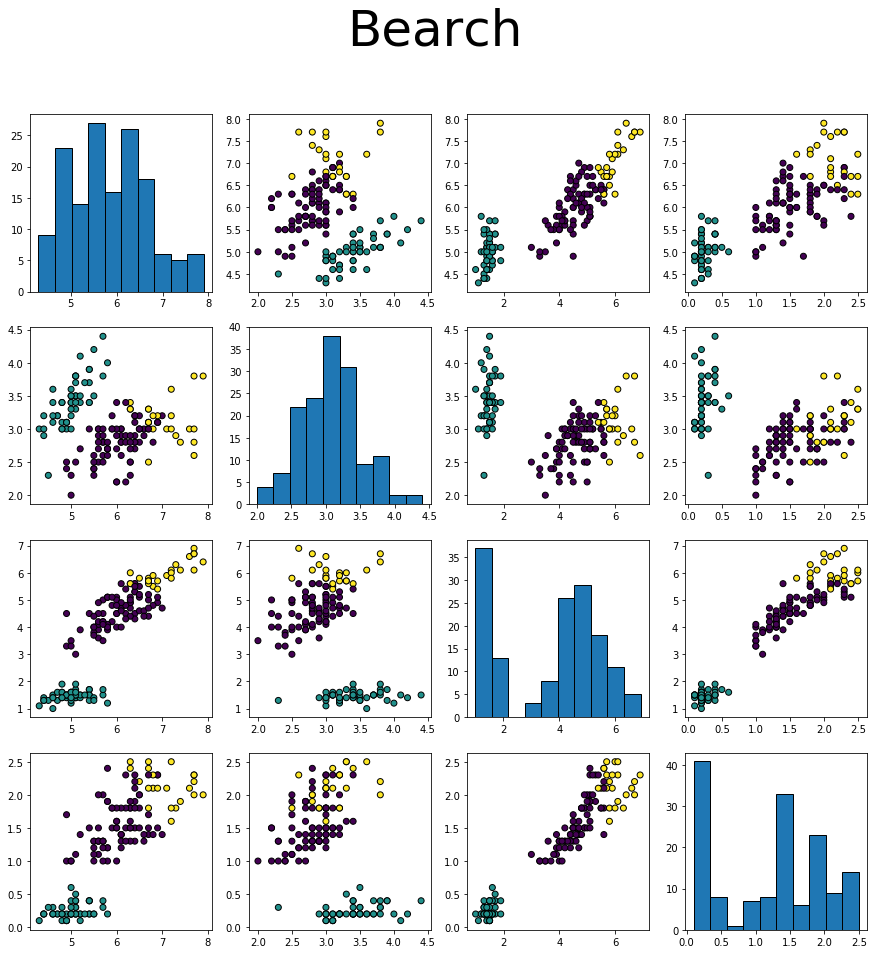

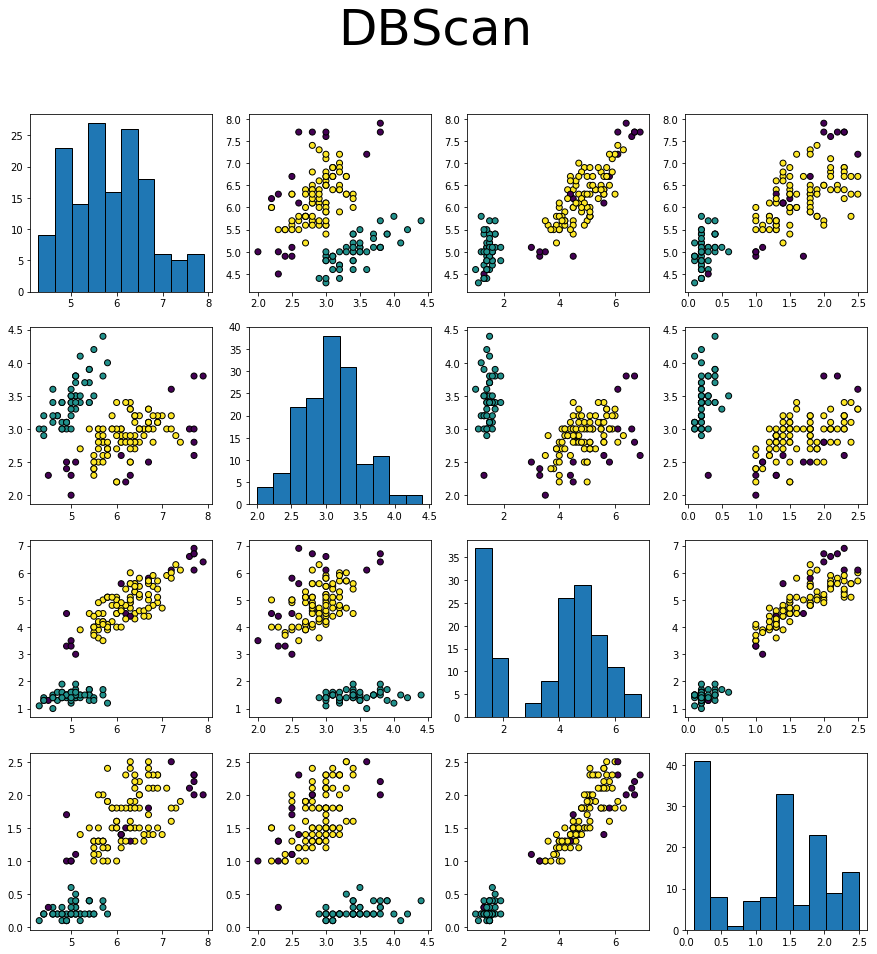

In [63]:
functions = [
    ('KMeans', KMeans(init='k-means++', n_clusters=3, n_init=300)),
    ('Bearch', Birch(threshold=0.75, n_clusters=3)),
    ('DBScan',DBSCAN(eps=0.5, min_samples=5))
]
for name, fun in functions:
    size = X.shape[1]
    fig, axarr = plt.subplots(size, size)
    fig.set_size_inches(15,15)
    fun.fit(X)
    for y in range(0, size):
        for x in range(0, size):
            plotClustering(X, fun.labels_, ax=axarr[y][x], features=(x,y))
#                 axarr[x][y].scatter(data[:, x], data[:, y], c= dataClass)
                


    fig.suptitle(name, fontsize=50)
    plt.show()

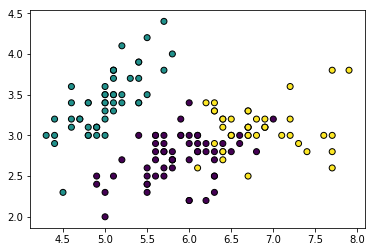

In [31]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=300)
k_means.fit(X)

plotClustering(X[:, :2], k_means.labels_)

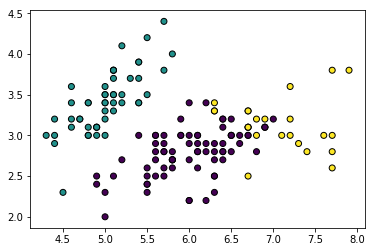

In [16]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

plotClustering(X[:, :2], birch.labels_)

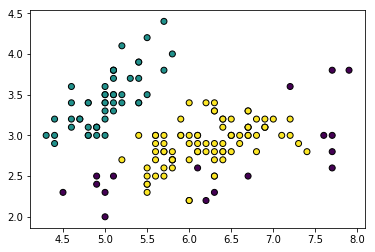

In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

plotClustering(X[:, :2], dbscan.labels_)